In [21]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

dir(breast)
X = breast.data
y = breast.target

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,        
                                                    random_state=1,                 
                                                    stratify=y)

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(), 
                         SVC(random_state=1))

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_pred)
print(cm)

[[40  2]
 [ 0 72]]


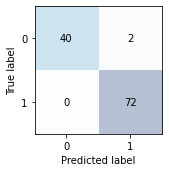

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()